# EDA 


In [51]:
import pandas as pd 

from matplotlib import pyplot as plt
from pandas import read_excel, concat
import seaborn as sb

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [52]:
res_info_df = pd.read_excel(f'data/res_info_data(2).xlsx')
res_info_df.head()

,식당이름,업태구분,주소,메뉴,가격,방문자리뷰,블로그리뷰,검색어,담당
0,하영호신촌설렁탕 역삼로점,"곰탕,설렁탕",서울 강남구 역삼로 215 1층,설렁탕,"11,000원",397,13,"역삼로 215, 신촌설렁탕",정훈
1,사보텐 압구정본점,돈가스,서울 강남구 압구정로32길 32 1층,시그니처카츠(히레),"18,500원",555,109,압구정로32길 32 캘리스코 사보텐,정훈
2,피오렌티나,이탈리아음식,서울 강남구 논현로 841 제이비 미소 빌딩,디너 코스 1인,"70,000원",90,53,논현로 841 피오렌티나,정훈
3,압구정변강쇠떡볶이,떡볶이,서울 강남구 도산대로46길 21 한진로즈힐아파트 101동 상가117호,쌀떡볶이(4줄) 1인분,"4,500원",1583,526,도산대로46길 21 압구정변강쇠떡볶이,정훈
4,마포만두 역삼점,만두,서울 강남구 논현로 429,메뉴없음,가격없음,25,3,논현로 429 마포만두,정훈


In [53]:
res_standard_df = pd.read_excel(f'data/res_category_기준.xlsx')
res_standard_df.head()

,업태구분,카테고리
0,2성급,없음
1,3성급,없음
2,4성급,없음
3,5성급,없음
4,JVL부대찌개,없음


## 1) 메뉴 카테고리 수

In [54]:
len(res_info_df['업태구분'].unique())

262

In [55]:
## 애매한 업태명
애매 = [ '전,빈대떡','요리주점', '곱창,막창,양','일식튀김,꼬치', '오뎅,꼬치','치킨,닭강정', '생선회', '포장마차','소고기구이', '바(BAR)','조개요리', '양꼬치','맥주,호프', '와인','돼지고기구이', '이자카야', '핫도그', '양갈비', '주류', '닭발', '전통,민속주점','브런치카페', '브런치','야식', '오징어요리', '뷔페','달빛오징어광어','음식점','강화통통생고기', '수산물', '식료품제조',   '바닷가재요리',  '전복요리', '심야오뎅', '화덕고깃간', '채소','닭장수후라이드','제사음식','쌀똑핫도그', '식품', '대게요리','카페','카페,디저트','베이커리','도시락,조리식품제조','과일,주스전문점', '떡,한과','아이스크림', '도넛', '과일','빵류제조','초콜릿전문점', '크레페', '와플', '과자,사탕,초코렛','커피가공,제조','호두과자','차,커피', '한방카페','힐링카페'
            ]

In [56]:
# 필요없는 카테고리(카페, 술, 출장요리 등등) 제거
제외 = [ '사주카페', '전처리필요','기업', '빙수', '우편취급국', '테이크아웃커피', 
       '광고대행', '네일아트,네일샵', '4성급', '패션', '프랜차이즈본사',
       '셀프,대여스튜디오', '바나프레소', '음료', '플라워카페', '편의점', '케이크전문', '스터디카페', '편의시설', 
       'PC방',  '노래방', '보드카페', '애견카페',
       '2성급',  '예식장', '식료품', '라이브카페', '부속건물', '모텔', '호텔', '유흥주점',
       '기업,빌딩', '공방', '영어회화','갤러리카페', '목욕탕,사우나','미용실', '도서관', '만화방', '골프용품', '초콜릿전문점',
        '영상,음향가전', '차','수제화', '주택',
       '인테리어디자인', '반찬가게', '헬스장','장소대여', '당구장', '요리교육', '무용,댄스', '스크린골프장', '종합패션', '댄스교육',
       '수예,자수',
       '경기장', '복합문화공간','임대업', 
       '모델하우스', '공연장', '꽃집,꽃배달', '스포츠시설', '취미,레저용품', '스포츠,오락', 
        '갤러리,화랑', '슈퍼,마트', '북카페', '애견훈련', '가공식품', '정육점','룸카페', '클럽', '오락시설', '실외골프연습장', '5성급',
       '종합가전', '테마카페',  '종합도소매',
       '콘도,리조트부속건물', '벽지,장판,마루', '중개업', '건강기능보조식품', '피부,체형관리', '경영컨설팅', '무용,발레',
       '찜질방', '미용','고시원,고시텔', '연예기획사', '남성정장','영화관','남성의류', '서적출판',
        '반려동물', '문구,팬시용품',
       '수입식품', '화장품,향수', '소프트웨어개발', '3성급', '운세,사주', '키즈카페,실내놀이터', '수입의류',
        '단란주점', '머리염색'  ]
for i in 제외 :
    res_info_df = res_info_df.drop(res_info_df[res_info_df['업태구분'] == i].index)

len(res_info_df)

7591

In [57]:
len(res_info_df['업태구분'].unique())

157

In [58]:
# 업태구분을 확인하고 라벨링하는 함수
def label_category(row):
    if row['업태구분'] in 제외:
        return '제외'
    elif row['업태구분'] in 애매:
        return '애매'
    else:
        return '사용'

## 2) 음식점의 업태구분과 제외/애매/사용 여부 '기준 데이터프레임' 생성 
->
앞으로 이 데이터프레임이 기준이 됨

In [59]:
# '구분'이라는 새로운 컬럼 추가
res_standard_df['구분'] = ''

# apply 함수를 사용하여 열에 함수 적용
res_standard_df['구분'] = res_standard_df.apply(label_category, axis=1)

res_standard_df.head(10)

,업태구분,카테고리,구분
0,2성급,없음,제외
1,3성급,없음,제외
2,4성급,없음,제외
3,5성급,없음,제외
4,JVL부대찌개,없음,사용
5,PC방,없음,제외
6,가공식품,없음,제외
7,갈비탕,찜/탕/찌개,사용
8,감자탕,찜/탕/찌개,사용
9,강화통통생고기,고기,애매


## 3) '기준 데이터프레임'을 사용하여 카테고리와 사용 여부 확인

In [60]:
# apply 함수를 사용하여 열에 함수 적용
res_info_df['구분'] = res_info_df.apply(label_category, axis=1)

# '카테고리'라는 새로운 컬럼 추가
res_info_df['카테고리'] = ''

# res_info_df와 res_standard_df의 '업태구분'을 기준으로 일치하는 경우에만 '카테고리' 컬럼 채우기
for idx, row in res_info_df.iterrows():
    match_row = res_standard_df[res_standard_df['업태구분'] == row['업태구분']]
    if not match_row.empty:
        res_info_df.at[idx, '카테고리'] = match_row.iloc[0]['카테고리']
    else:
        res_info_df.at[idx, '카테고리'] = '없음'

res_info_df.head(10)

,식당이름,업태구분,주소,메뉴,가격,방문자리뷰,블로그리뷰,검색어,담당,구분,카테고리
0,하영호신촌설렁탕 역삼로점,"곰탕,설렁탕",서울 강남구 역삼로 215 1층,설렁탕,"11,000원",397,13,"역삼로 215, 신촌설렁탕",정훈,사용,찜/탕/찌개
1,사보텐 압구정본점,돈가스,서울 강남구 압구정로32길 32 1층,시그니처카츠(히레),"18,500원",555,109,압구정로32길 32 캘리스코 사보텐,정훈,사용,일식
2,피오렌티나,이탈리아음식,서울 강남구 논현로 841 제이비 미소 빌딩,디너 코스 1인,"70,000원",90,53,논현로 841 피오렌티나,정훈,사용,이탈리아
3,압구정변강쇠떡볶이,떡볶이,서울 강남구 도산대로46길 21 한진로즈힐아파트 101동 상가117호,쌀떡볶이(4줄) 1인분,"4,500원",1583,526,도산대로46길 21 압구정변강쇠떡볶이,정훈,사용,분식
4,마포만두 역삼점,만두,서울 강남구 논현로 429,메뉴없음,가격없음,25,3,논현로 429 마포만두,정훈,사용,한식
5,소미카페,카페,서울 강남구 언주로63길 16,메뉴없음,가격없음,0,0,언주로63길 16 소미,정훈,애매,카페
6,강남 원주추어탕,추어탕,서울 강남구 강남대로110길 6,갈아서 원주추어탕,"14,000원",1558,539,강남대로110길 6 강남 원주 추어탕,정훈,사용,찜/탕/찌개
7,날마다막창,"곱창,막창,양",서울 강남구 역삼로63길 17,계란찜,"8,000원",67,43,역삼로63길 17 날마다막창,정훈,애매,고기
8,요리가 있는 술집,요리주점,서울 강남구 선릉로86길 44-5 B1층,토마토해물파스타,"22,000원",32,11,선릉로86길 44-5 요리가 있는 술집,정훈,애매,술
9,달래해장 강남역플래티넘점,한식,서울 강남구 강남대로78길 14 1층,특 해장국,"13,000원",405,203,강남대로78길 14 달래해장,정훈,사용,한식


# 시각화

In [61]:
# '구분'이 '사용'인 행들만 필터링
filtered_res_info_df = res_info_df.drop(columns=['담당'],inplace=True)
filtered_res_info_df = res_info_df[res_info_df['구분'] == '사용']
filtered_res_info_df

,식당이름,업태구분,주소,메뉴,가격,방문자리뷰,블로그리뷰,검색어,구분,카테고리
0,하영호신촌설렁탕 역삼로점,"곰탕,설렁탕",서울 강남구 역삼로 215 1층,설렁탕,"11,000원",397,13,"역삼로 215, 신촌설렁탕",사용,찜/탕/찌개
1,사보텐 압구정본점,돈가스,서울 강남구 압구정로32길 32 1층,시그니처카츠(히레),"18,500원",555,109,압구정로32길 32 캘리스코 사보텐,사용,일식
2,피오렌티나,이탈리아음식,서울 강남구 논현로 841 제이비 미소 빌딩,디너 코스 1인,"70,000원",90,53,논현로 841 피오렌티나,사용,이탈리아
3,압구정변강쇠떡볶이,떡볶이,서울 강남구 도산대로46길 21 한진로즈힐아파트 101동 상가117호,쌀떡볶이(4줄) 1인분,"4,500원",1583,526,도산대로46길 21 압구정변강쇠떡볶이,사용,분식
4,마포만두 역삼점,만두,서울 강남구 논현로 429,메뉴없음,가격없음,25,3,논현로 429 마포만두,사용,한식
...,...,...,...,...,...,...,...,...,...,...
8290,정돈식당,"육류,고기요리",서울 강남구 일원로9길 22 1층,정돈 돼지모듬,"52,000원",331,47,일원로9길 22 정돈식당,사용,고기
8291,족발장인네 칼국수,한식,서울 강남구 강남대로114길 32 1층 101호,양지칼국수,"10,000원",33,32,"강남대로114길 32, 족발장인네 칼국수",사용,한식
8293,그때그집,"족발,보쌈",서울 강남구 선릉로129길 17,족발,"58,000원",295,147,선릉로129길 17 그때그집,사용,족발/보쌈
8294,델리커리 삼성포스코점,카레,서울 강남구 테헤란로 440 포스코센터 지하 1층,3색 카레 (2인분),"35,000원",473,125,"테헤란로 440, 델리커리",사용,아시안


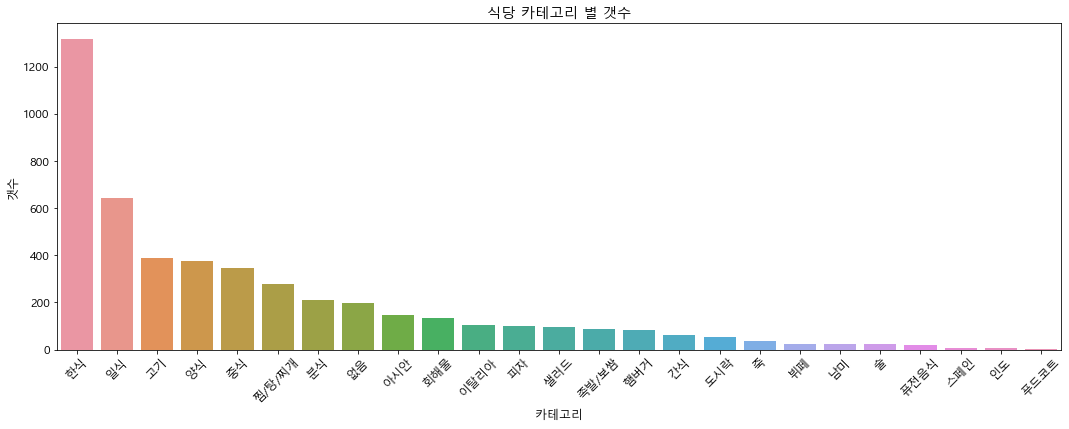

In [62]:

# 카테고리 별 갯수를 세기
category_counts = filtered_res_info_df['카테고리'].value_counts()

# seaborn을 사용하여 시각화
plt.figure(figsize=(18, 6))
sb.countplot(data=filtered_res_info_df, x='카테고리', order=category_counts.index)
plt.xticks(rotation=45)
plt.xlabel('카테고리')
plt.ylabel('갯수')
plt.title('식당 카테고리 별 갯수')
plt.show()

In [63]:
category_counts_df = pd.DataFrame({'카테고리': category_counts.index, '갯수': category_counts.values})
category_counts_df

,카테고리,갯수
0,한식,1318
1,일식,642
2,고기,390
3,양식,376
4,중식,348
5,찜/탕/찌개,279
6,분식,211
7,없음,198
8,아시안,146
9,회해물,133


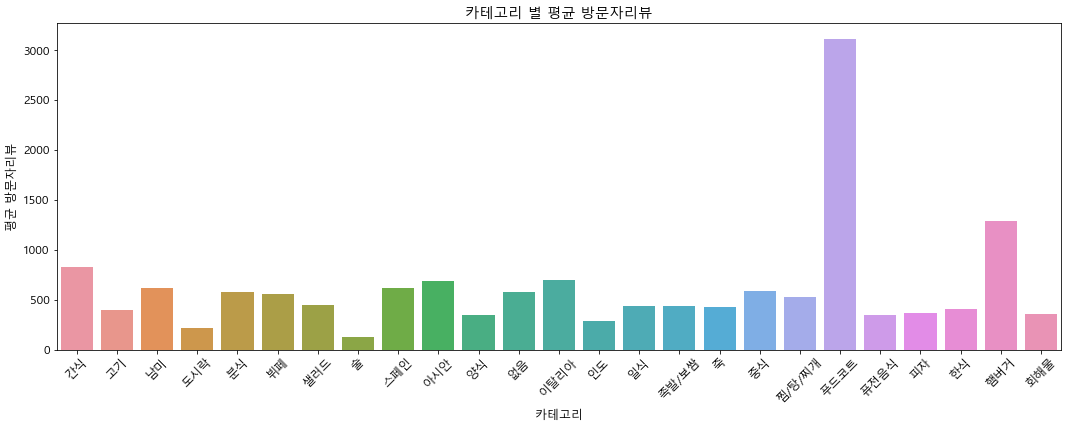

In [67]:
# '구분'이 '사용'인 행들만 필터링
filtered_res_info_df = res_info_df[res_info_df['구분'] == '사용']

# '카테고리' 별 '방문자리뷰'의 평균 계산
avg_review_by_category = filtered_res_info_df.groupby('카테고리')['방문자리뷰'].mean().reset_index()

# 시각화
plt.figure(figsize=(18, 6))
sb.barplot(data=avg_review_by_category, x='카테고리', y='방문자리뷰')
plt.xticks(rotation=45)
plt.xlabel('카테고리')
plt.ylabel('평균 방문자리뷰')
plt.title('카테고리 별 평균 방문자리뷰')
plt.show()

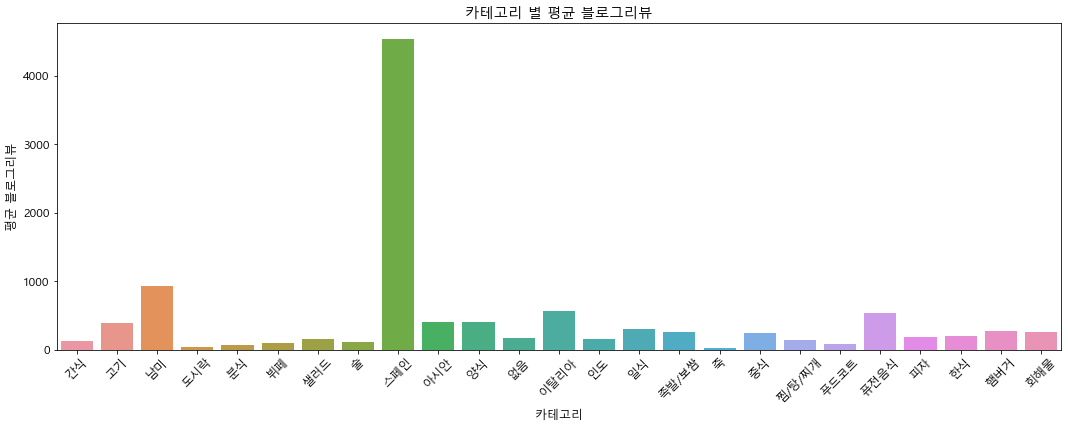

In [68]:
# '카테고리' 별 '블로그리뷰' 평균 계산
avg_review_by_category = filtered_res_info_df.groupby('카테고리')['블로그리뷰'].mean().reset_index()

# 시각화
plt.figure(figsize=(18, 6))
sb.barplot(data=avg_review_by_category, x='카테고리', y='블로그리뷰')
plt.xticks(rotation=45)
plt.xlabel('카테고리')
plt.ylabel('평균 블로그리뷰')
plt.title('카테고리 별 평균 블로그리뷰')
plt.show()